In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import peptide

337.1988


In [2]:
amino_acid_masses = {
    "A": 71.03711,   # Alanine
    "R": 156.10111,  # Arginine
    "N": 114.04293,  # Asparagine
    "D": 115.02694,  # Aspartic acid
    "C": 103.00919,  # Cysteine
    "E": 129.04259,  # Glutamic acid
    "Q": 128.05858,  # Glutamine
    "G": 57.02146,   # Glycine
    "H": 137.05891,  # Histidine
    "(I/L)": 113.08406,  # Isoleucine
    #"L": 113.08406,  # Leucine
    "K": 128.09496,  # Lysine
    "M": 131.04049,  # Methionine
    "F": 147.06841,  # Phenylalanine
    "P": 97.05276,   # Proline
    "S": 87.03203,   # Serine
    "T": 101.04768,  # Threonine
    "W": 186.07931,  # Tryptophan
    "Y": 163.06333,  # Tyrosine
    "V": 99.06841,    # Valine
    "R(Me)": 156.10111 + 14.01565,  # Methylated Arginine
}


In [3]:
ptm_masses = {
    "Me": 14.01565,  
    'Me2': 28.0313,
    }

In [4]:
def decode_ideal_spec(data, tolerance=0.5):
    data = [0] + data
    graph = {}
    for i in range(len(data) - 1):
        each_start = data[i]
        for j in range(i + 1, len(data)):
            the_difference = data[j] - each_start
            for eahc_pep in amino_acid_masses:
                if the_difference <= amino_acid_masses[eahc_pep] + tolerance and the_difference >= amino_acid_masses[eahc_pep] - tolerance:
                    #print(data[i], '->', data[j], ':', eahc_pep)
                    if data[i] in graph:
                        graph[data[i]].append((data[j], eahc_pep))
                    else:
                        graph[data[i]] = [(data[j], eahc_pep)]
                    break
    return graph

In [5]:
def get_paths(graph, start):
    paths = []

    def dfs(node, path):
        if node not in graph or not graph[node]:
            # No outgoing edges → path ends here
            paths.append(path)
            return
        for nxt, label in graph[node]:
            dfs(nxt, path + [label])

    dfs(start, [])
    return paths

def ideal_spec(the_aa_array):
    result = []
    for i in range(len(the_aa_array) + 1):
        current_array = the_aa_array[:i]
        the_number = 0
        for j in current_array:
            the_number += j.get_mass()
        result.append(the_number)
    for i in range(1, len(the_aa_array)):
        current_array = the_aa_array[i:]
        the_number = 0
        for j in current_array:
            the_number += j.get_mass()
        result.append(the_number)
    result.sort()
    return result


def DecodingIdealSpectrum(spectrum):
    graph = decode_ideal_spec(spectrum)
    #print(graph)
    all_pathes = get_paths(graph, 0)
    #print(all_pathes)
    all_pathes = [''.join(p) for p in all_pathes]
    #print(all_pathes)
    for i in all_pathes:
        #print(ideal_spec(i))
        if ideal_spec(i)[1:] == spectrum:
            return i

In [6]:
the_pep = peptide.Pep("[GGNFSGR(Me)GGFGGSR+2H]2+")
the_pep.AA_array

[G, G, N, F, S, G, R(Me), G, G, F, G, G, S, R]

In [7]:
ideal_spec(the_pep.AA_array)

[0,
 57.02146,
 114.04292,
 156.10111,
 228.08585,
 243.13314000000003,
 300.1546,
 357.17606,
 375.15426,
 462.18629000000004,
 504.24447000000004,
 519.20775,
 561.26593,
 618.28739,
 689.32451,
 746.3459700000001,
 788.4041499999998,
 803.3674300000001,
 845.42561,
 932.4576400000001,
 950.4358400000001,
 1007.4573000000001,
 1064.4787600000002,
 1079.5260500000002,
 1151.5107900000003,
 1193.5689800000002,
 1250.5904400000002,
 1307.6119000000003]

In [8]:
df = pd.read_csv('data/data_table/data_sheet1.csv')
conserve_line_df = df[(df['m1+m2']< 1327+1) & (df['m1+m2']> 1327-1)]

In [9]:
conserve_line_list = list(conserve_line_df['mass1']) + list(conserve_line_df['mass2'])

In [10]:
conserve_line_list.sort()
conserve_line_list

[318.85,
 505.13,
 523.26,
 580.39,
 637.39,
 690.36,
 747.43,
 804.37,
 822.35,
 1008.58]

In [11]:
def decode_ideal_spec_print(data, tolerance=0.8):
    data = [0] + data
    graph = {}
    for i in range(len(data) - 1):
        each_start = data[i]
        for j in range(i + 1, len(data)):
            the_difference = data[j] - each_start
            for eahc_pep in amino_acid_masses:
                if the_difference <= amino_acid_masses[eahc_pep] + tolerance and the_difference >= amino_acid_masses[eahc_pep] - tolerance:
                    print(data[i], '->', data[j], ':', eahc_pep)

In [12]:
graph_data = decode_ideal_spec(conserve_line_list)

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_90422/2241967387.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


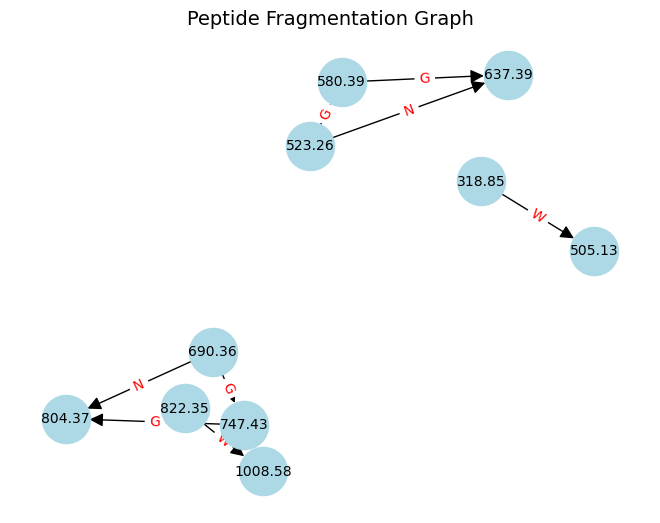

In [13]:
import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add edges with labels
for src, targets in graph_data.items():
    for dst, label in targets:
        G.add_edge(src, dst, label=label)

# Choose layout (spring_layout = general, shell_layout = ordered)
pos = nx.spring_layout(G, seed=42, k=0.6)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1200, font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_color='red')

# Optional: Adjust margins and title
plt.title("Peptide Fragmentation Graph", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
from collections import defaultdict
from typing import Dict, List, Tuple, Any, Set

Adj = Dict[Any, List[Tuple[Any, Any]]]

def all_paths(adj: Adj):
    """
    Enumerate all simple paths in a directed graph represented as:
        { node: [(neighbor, edge_label), ...], ... }

    Returns: List of dicts with:
        - 'nodes': [n0, n1, ..., nk]
        - 'edges': [(n0, n1, label01), (n1, n2, label12), ...]
    Handles:
        - Disconnected components
        - Nodes with no outgoing edges (isolated or sinks)
        - Cycles (won't revisit a node already in the current path)
    """
    # Collect all nodes (appear as keys or neighbors)
    nodes: Set[Any] = set(adj.keys())
    for u, outs in adj.items():
        for v, _lbl in outs:
            nodes.add(v)

    # Normalize: ensure every node exists as a key
    norm_adj: Adj = {u: list(adj.get(u, [])) for u in nodes}

    # Compute in-degrees to find sources (roots of components)
    indeg = defaultdict(int)
    for u, outs in norm_adj.items():
        for v, _lbl in outs:
            indeg[v] += 1
    sources = [u for u in nodes if indeg[u] == 0]

    # If there are cycles that make every node have indegree>0,
    # fall back to starting from every node (we still avoid revisits).
    if not sources:
        sources = list(nodes)

    out_paths = []

    def dfs(u, visited, node_path, edge_path):
        visited.add(u)
        node_path.append(u)

        # If u has no outgoing edges OR all neighbors are already visited -> treat as leaf
        outs = norm_adj.get(u, [])
        advanced = False
        for v, lbl in outs:
            if v not in visited:
                advanced = True
                edge_path.append((u, v, lbl))
                dfs(v, visited, node_path, edge_path)
                edge_path.pop()
        if not advanced:
            # Reached a sink (or all next steps would revisit): record path
            out_paths.append({
                'nodes': list(node_path),
                'edges': list(edge_path),
            })

        node_path.pop()
        visited.remove(u)

    # Also account for isolated nodes (no in, no out) — they’ll be included via sources
    for s in sources:
        dfs(s, set(), [], [])

    # Deduplicate paths in case multiple starts hit the same leaf (rare but possible).
    # We’ll dedupe by (tuple(nodes), tuple(edges))
    seen = set()
    unique = []
    for p in out_paths:
        key = (tuple(p['nodes']), tuple(p['edges']))
        if key not in seen:
            seen.add(key)
            unique.append(p)
    return unique



In [15]:
all_paths(graph_data)

[{'nodes': [523.26, 580.39, 637.39],
  'edges': [(523.26, 580.39, 'G'), (580.39, 637.39, 'G')]},
 {'nodes': [523.26, 637.39], 'edges': [(523.26, 637.39, 'N')]},
 {'nodes': [690.36, 747.43, 804.37],
  'edges': [(690.36, 747.43, 'G'), (747.43, 804.37, 'G')]},
 {'nodes': [690.36, 804.37], 'edges': [(690.36, 804.37, 'N')]},
 {'nodes': [822.35, 1008.58], 'edges': [(822.35, 1008.58, 'W')]},
 {'nodes': [318.85, 505.13], 'edges': [(318.85, 505.13, 'W')]}]

In [16]:
from collections import Counter
from math import gcd
from functools import reduce
from typing import List

def permutations_sum(nums: List[int], target: int) -> List[List[int]]:
    """
    Return all unique permutations drawn from nums (each value used ≤ its count)
    whose elements sum to target. Assumes all numbers are non-negative.
    """
    # Remove zeros (they cause infinite branching; also don't help reach a positive target)
    nums = [x for x in nums if x > 0]
    counts = Counter(nums)
    uniq = sorted(counts)  # ascending for early pruning
    res: List[List[int]] = []

    # Necessary (cheap) pruning: if gcd of all values doesn't divide target, no solutions
    if not uniq:
        return [[]] if target == 0 else []
    g = reduce(gcd, uniq)
    if target % g != 0:
        return []

    def dfs(remain: int, path: List[int]) -> None:
        if remain == 0:
            res.append(path.copy())
            return
        # try each available value (order matters => try all)
        for v in uniq:
            if counts[v] == 0: 
                continue
            if v > remain:      # prune (nums are non-negative & sorted)
                break
            counts[v] -= 1
            path.append(v)
            dfs(remain - v, path)
            path.pop()
            counts[v] += 1

    dfs(target, [])
    return res

# Variant: unlimited reuse of candidates (ignore input multiplicities)
def permutations_sum_unlimited(nums: List[int], target: int) -> List[List[int]]:
    nums = sorted({x for x in nums if x > 0})
    if not nums:
        return [[]] if target == 0 else []
    g = reduce(gcd, nums)
    if target % g != 0:
        return []
    res: List[List[int]] = []

    def dfs(remain: int, path: List[int]) -> None:
        if remain == 0:
            res.append(path.copy())
            return
        for v in nums:
            if v > remain:
                break
            path.append(v)
            dfs(remain - v, path)
            path.pop()

    dfs(target, [])
    return res

In [35]:

def permutations_sum_unlimited(nums: List[int], target: int, tolerance: int = 0) -> List[List[int]]:
    """
    Enumerate all order-sensitive sequences made from positive values in `nums` (unlimited reuse)
    whose sum is within [target - tolerance, target + tolerance], inclusive.

    Notes:
    - Ignores non-positives to guarantee finiteness.
    - Uses a gcd reachability check to quickly return [] when no sum in the window is reachable.
    """
    if tolerance < 0:
        raise ValueError("tolerance must be >= 0")

    vals = sorted({x for x in nums if x > 0})
    lo = max(0, target - tolerance)
    hi = target + tolerance
    res: List[List[int]] = []

    if not vals:
        return [[]] if lo <= 0 <= hi else []

    # Reachability: sums are multiples of gcd(vals). If no multiple lies in [lo, hi], no solutions.
    g = reduce(gcd, vals)
    first_multiple = ((lo + g - 1) // g) * g
    if first_multiple > hi:
        return []

    def dfs(cur_sum: int, path: List[int]) -> None:
        if lo <= cur_sum <= hi:
            res.append(path.copy())
            # don't return here; longer sequences may still be valid until cur_sum > hi
        if cur_sum >= hi:
            return
        for v in vals:
            nv = cur_sum + v
            if nv > hi:
                break
            path.append(v)
            dfs(nv, path)
            path.pop()

    dfs(0, [])
    return res

In [ ]:
def permutations_sum_unlimited_keys(weights: Dict[str, int],
                                    target: int,
                                    tolerance: int = 0) -> List[List[str]]:
    """
    Enumerate all order-sensitive sequences of KEYS (unlimited reuse) such that
    the sum of their associated weights is within [target - tolerance, target + tolerance].

    - Ignores keys with non-positive weights to avoid infinite loops.
    - Uses a gcd reachability check to quickly skip impossible windows.
    """
    if tolerance < 0:
        raise ValueError("tolerance must be >= 0")

    # Keep only positive-weight items; sort by weight for pruning
    items = sorted(((k, v) for k, v in weights.items() if v > 0), key=lambda kv: kv[1])
    lo = max(0, target - tolerance)
    hi = target + tolerance
    res: List[List[str]] = []

    if not items:
        return [[]] if lo <= 0 <= hi else []

    # Reachability: any achievable sum is a multiple of gcd of weights
    uniq_vals = sorted({v for _, v in items})
    g = reduce(gcd, uniq_vals)
    first_multiple = ((lo + g - 1) // g) * g
    if first_multiple > hi:
        return []

    def dfs(cur_sum: int, path: List[str]) -> None:
        if lo <= cur_sum <= hi:
            res.append(path.copy())
            # continue; longer sequences might still keep sum ≤ hi
        if cur_sum >= hi:
            return
        for k, v in items:
            nv = cur_sum + v
            if nv > hi:
                break  # items sorted by weight ⇒ safe to break
            path.append(k)
            dfs(nv, path)
            path.pop()

    dfs(0, [])
    return res

In [40]:
a = permutations_sum_unlimited([2,3,5], 10, 1)
# -> [[3,5], [5,3], [3,3,2], [3,2,3], [2,3,3]]

In [41]:
a

[[2, 2, 2, 2, 2],
 [2, 2, 2, 2, 3],
 [2, 2, 2, 3],
 [2, 2, 2, 3, 2],
 [2, 2, 2, 5],
 [2, 2, 3, 2],
 [2, 2, 3, 2, 2],
 [2, 2, 3, 3],
 [2, 2, 5],
 [2, 2, 5, 2],
 [2, 3, 2, 2],
 [2, 3, 2, 2, 2],
 [2, 3, 2, 3],
 [2, 3, 3, 2],
 [2, 3, 3, 3],
 [2, 3, 5],
 [2, 5, 2],
 [2, 5, 2, 2],
 [2, 5, 3],
 [3, 2, 2, 2],
 [3, 2, 2, 2, 2],
 [3, 2, 2, 3],
 [3, 2, 3, 2],
 [3, 2, 3, 3],
 [3, 2, 5],
 [3, 3, 2, 2],
 [3, 3, 2, 3],
 [3, 3, 3],
 [3, 3, 3, 2],
 [3, 3, 5],
 [3, 5, 2],
 [3, 5, 3],
 [5, 2, 2],
 [5, 2, 2, 2],
 [5, 2, 3],
 [5, 3, 2],
 [5, 3, 3],
 [5, 5]]

In [27]:
a_len = [len(i) for i in a]

In [28]:
np.array(a_len).mean()

np.float64(10.678096083153758)

In [30]:
len(a)

15778

In [33]:
def find_all_paths(graph):
    """
    Finds all possible paths in a directed graph.

    This function traverses a graph represented by an adjacency list to find
    all possible paths from a starting node to a terminal node (a node with
    no outgoing edges).

    Args:
        graph: A dictionary where keys are starting nodes and values are lists
               of tuples. Each tuple contains a destination node and an
               annotation (edge label).
               Example: {node1: [(node2, 'A'), (node3, 'B')]}

    Returns:
        A list of strings, where each string represents a unique path in the
        format "(start_node)annotations(end_node)".
    """
    all_paths = []

    def dfs(start_node, current_node, accumulated_annotes):
        """
        A recursive helper function to perform a Depth-First Search.

        Args:
            start_node: The original starting node of the path.
            current_node: The node currently being visited.
            accumulated_annotes: The concatenated string of annotations for the
                                 path traversed so far.
        """
        # A terminal node is one that does not have any outgoing edges,
        # meaning it won't be a key in the graph dictionary.
        if current_node not in graph:
            # We have reached the end of a path. Format and save it.
            path_string = f"({start_node}){accumulated_annotes}({current_node})"
            all_paths.append(path_string)
            return

        # If the current node is not a terminal node, continue to its neighbors.
        for next_node, annote in graph[current_node]:
            # Recursively call dfs for each neighbor, appending the new annotation.
            dfs(start_node, next_node, accumulated_annotes + annote)

    # Iterate through each node in the graph dictionary as a potential starting point.
    for node in graph:
        # Begin the DFS for each of its direct neighbors.
        for neighbor, first_annote in graph[node]:
            dfs(start_node=node, current_node=neighbor, accumulated_annotes=first_annote)

    return all_paths

# --- Example Usage ---
if __name__ == "__main__":
    # The example graph provided in the problem description
    example_graph = graph_data
    
    
    # Find all the paths in the graph
    paths = find_all_paths(example_graph)

    # Print the results
    print("Found the following paths:")
    for path in paths:
        print(path)

Found the following paths:
(318.85)W(505.13)
(523.26)GG(637.39)
(523.26)N(637.39)
(580.39)G(637.39)
(690.36)GG(804.37)
(690.36)N(804.37)
(747.43)G(804.37)
(822.35)W(1008.58)


In [34]:
graph_data

{318.85: [(505.13, 'W')],
 523.26: [(580.39, 'G'), (637.39, 'N')],
 580.39: [(637.39, 'G')],
 690.36: [(747.43, 'G'), (804.37, 'N')],
 747.43: [(804.37, 'G')],
 822.35: [(1008.58, 'W')]}